In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (validation_images, validation_labels) = mnist.load_data()

In [2]:
#!pip install --upgrade tensorflow-gpu
print(tf. __version__)

2.10.0


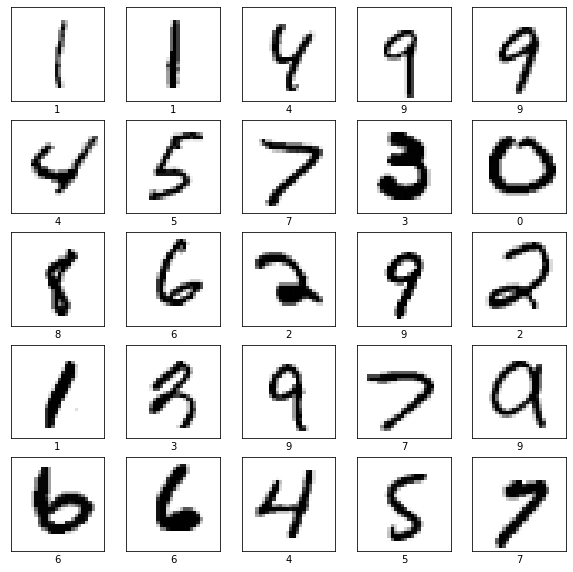

In [3]:
text_labels = range(10)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    img_index = np.random.randint(0, train_images.shape[0])
    plt.imshow(train_images[img_index], cmap="gray_r")
    plt.xlabel(text_labels[train_labels[img_index]])

In [4]:
ntr = train_images.shape[0] 
dx = train_images.shape[1]*train_images.shape[2] 
batchsize = 256
num_epochs = 300
n_hidden_units = 128
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(28,28)))
model.add(tf.keras.layers.Normalization(axis=[1,2]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(n_hidden_units, activation='relu'))
model.add(tf.keras.layers.Dense(dx))
model.add(tf.keras.layers.Reshape((28, 28), input_shape=(dx,)))
model.add(tf.keras.layers.Normalization(axis=[1,2], invert=True))
model.summary()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 28, 28)           1569      
 n)                                                              
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 784)               101136    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
 normalization_1 (Normalizat  (None, 28, 28)           1569      
 ion)                                                   

In [5]:
model.layers[0].adapt(train_images)
model.layers[-1].adapt(train_images)
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='MeanSquaredError')
hist = model.fit(x=train_images, y=train_images, batch_size = batchsize, epochs=num_epochs)

Epoch 1/300
235/235 [==============================] - 3s 4ms/step - loss: 10090832.0000
Epoch 2/300
235/235 [==============================] - 1s 5ms/step - loss: 522071.3438
Epoch 3/300
235/235 [==============================] - 1s 5ms/step - loss: 307956.6250
Epoch 4/300
235/235 [==============================] - 2s 7ms/step - loss: 222515.3750
Epoch 5/300
235/235 [==============================] - 1s 5ms/step - loss: 169995.9688
Epoch 6/300
235/235 [==============================] - 1s 6ms/step - loss: 133340.6562
Epoch 7/300
235/235 [==============================] - 1s 5ms/step - loss: 108226.9609
Epoch 8/300
235/235 [==============================] - 1s 5ms/step - loss: 90152.6562
Epoch 9/300
235/235 [==============================] - 1s 5ms/step - loss: 76927.7422
Epoch 10/300
235/235 [==============================] - 1s 5ms/step - loss: 66731.7266
Epoch 11/300
235/235 [==============================] - 1s 5ms/step - loss: 58885.9609
Epoch 12/300
235/235 [=====================

In [6]:
len(model.layers[0].get_weights())

3

1875/1875 [==============================] - 3s 2ms/step


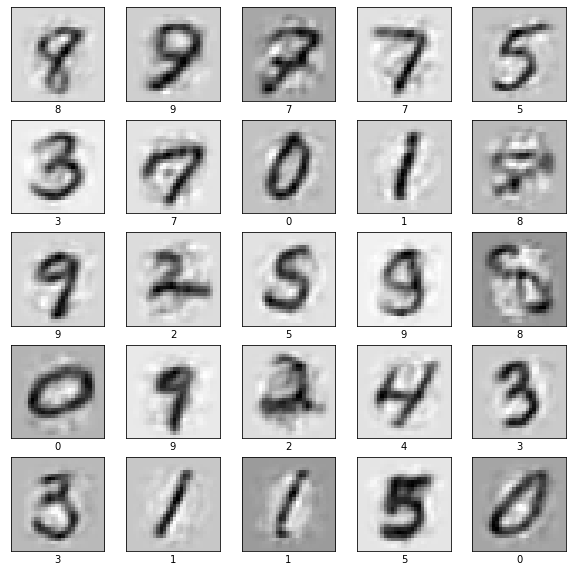

In [7]:
reconstruction = model.predict(train_images)
text_labels = range(10)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    img_index = np.random.randint(0, train_images.shape[0])
    plt.imshow(reconstruction[img_index], cmap="gray_r")
    plt.xlabel(text_labels[train_labels[img_index]])